Loading Skull Striped Image

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

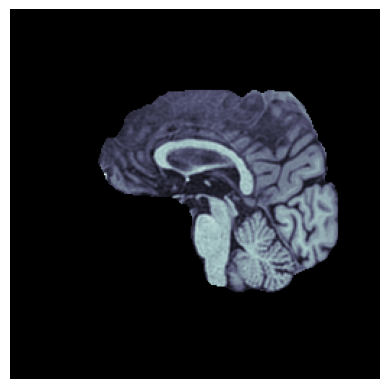

In [16]:
import nibabel as nb
import matplotlib.pyplot as plt

path=r"C:\Users\reeba\OneDrive\Desktop\Work\Coding\Python\datasets\ADNI_0~1.NII\ADNI_0~1.NII"

image=nb.load(path)

image_data= image.get_fdata()

img=image_data[:,:,image_data.shape[2]//2]

plt.imshow(img,cmap='bone')
plt.axis('off')

Cropping and Padding

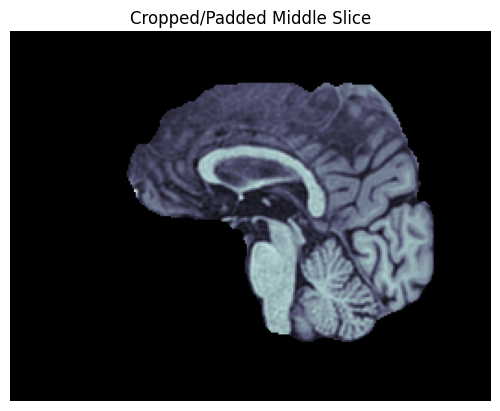

In [14]:
import torchio as tio

croporpad = tio.Subject(
    mri=tio.ScalarImage(path)
)

crop_or_pad=tio.CropOrPad((200,260,200))

crop_image= crop_or_pad(croporpad)

crop_im = crop_image['mri'].data.squeeze().numpy()

middle = crop_im.shape[2]//2

plt.imshow(crop_im[:, :, middle], cmap='bone')
plt.title('Cropped/Padded Middle Slice')
plt.axis('off')
plt.show()


To canonical image

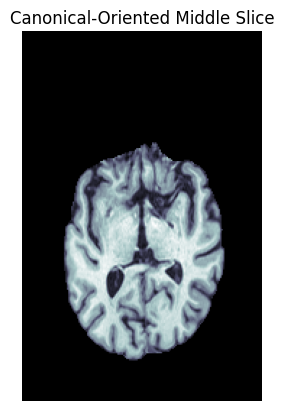

In [11]:
subject = tio.Subject(mri=tio.ScalarImage(path))

# Apply ToCanonical
to_canonical = tio.ToCanonical()
canonical_subject = to_canonical(subject)

# Extract the canonical image as numpy array
canonical_image = canonical_subject['mri'].data.squeeze().numpy()

# Visualize the middle axial slice
middle = canonical_image.shape[2] // 2
plt.imshow(canonical_image[:, :, middle].T, cmap='bone', origin='lower')
plt.title('Canonical-Oriented Middle Slice')
plt.axis('off')
plt.show()

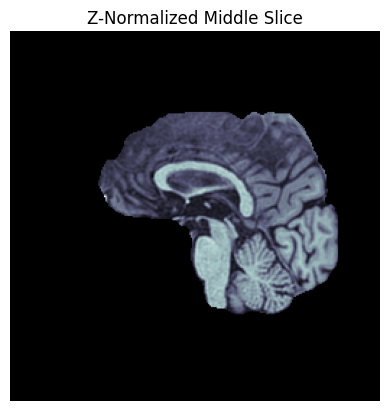

In [18]:
subject = tio.Subject(mri=tio.ScalarImage(path))

# Apply ZNormalization (voxel-wise mean=0, std=1)
z_norm = tio.ZNormalization()
normalized_subject = z_norm(subject)

# Extract normalized image as NumPy array
normalized_img = normalized_subject['mri'].data.squeeze().numpy()

# Visualize the middle axial slice
middle = normalized_img.shape[2] // 2
plt.imshow(normalized_img[:, :, middle], cmap='bone')
plt.title('Z-Normalized Middle Slice')
plt.axis('off')
plt.show()

Applying CLAHE

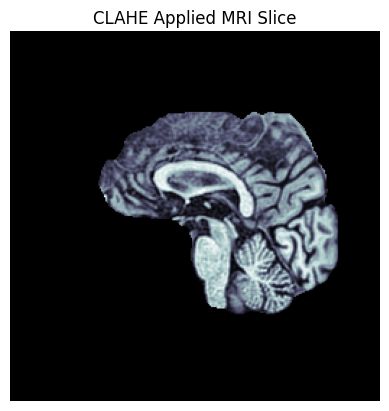

In [20]:
import cv2 
import numpy as np

img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
img_uint8 = img_norm.astype(np.uint8)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img_uint8)

# Display the result
plt.imshow(clahe_img, cmap='bone')
plt.axis('off')
plt.title("CLAHE Applied MRI Slice")
plt.show()

Deonoising

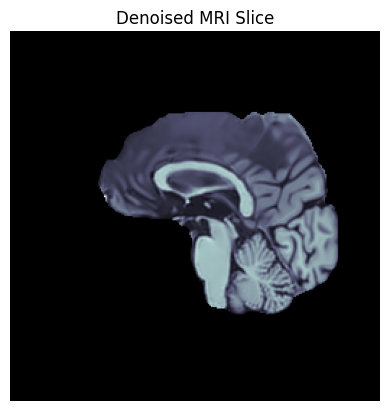

In [ ]:
img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
img_uint8 = img_norm.astype(np.uint8)

# Apply Non-local Means Denoising
denoised_img = cv2.fastNlMeansDenoising(img_uint8, h=10, templateWindowSize=7, searchWindowSize=21)

# Display the denoised image
plt.imshow(denoised_img, cmap='bone')
plt.axis('off')
plt.title("Denoised MRI Slice")
plt.show()

# Shows bad results, creases and folds of the brain are getting blurred

Applying Thresholding 

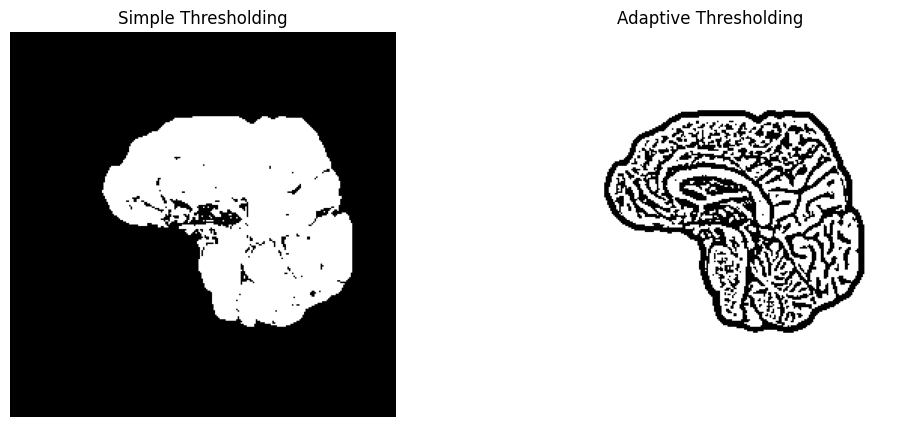

In [25]:
_, thresh_img = cv2.threshold(img_uint8, 40, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    img_uint8, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, blockSize=11, C=2
)

# Display side-by-side
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(thresh_img, cmap='gray')
plt.title("Simple Thresholding")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')

plt.show()